In [1]:
from google.colab import files
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

time = 100

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
data_path = 'log.txt'
with open(data_path, 'r') as f:
    lines = f.read().rstrip('\n').split('\n')

Saving log.txt to log.txt
User uploaded file "log.txt" with length 5148 bytes


In [2]:
# compute delays and bandwidths
delays, bandwidths = [[] for _ in range(time)], [[] for _ in range(time)]
for count, line in enumerate(lines):
  line = line.split()
  if count == 0:
    start = int(float(line[3]))
  for i in range(time):
    if start + i <= int(float(line[2])) < start + i + 1:
      delay = float(line[3]) - float(line[2])
      delays[i].append(delay)
      bandwidths[i].append(float(line[4]))
print(delays)
print(bandwidths)

[[9.703636169433594e-05], [], [6.127357482910156e-05, 0.00020456314086914062], [], [5.626678466796875e-05, 0.0002894401550292969], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [0.00027489662170410156], [], [], [], [], [], [0.0002529621124267578], [], [0.00023627281188964844], [], [], [], [], [], [], [], [], [], [], [], [0.0002987384796142578], [], [], [0.00014591217041015625], [0.00019097328186035156], [], [], [0.0002543926239013672], [0.0002295970916748047], [], [], [], [0.0002262592315673828, 0.00019288063049316406], [0.0001983642578125], [0.00021767616271972656, 0.00020122528076171875], [], [], [], [], [], [], [], [], [0.00023245811462402344], [0.00019550323486328125], [], [], [], [0.0002772808074951172], [], [], [], [0.0003001689910888672], [], [0.00024366378784179688], [], [], [], [0.0002696514129638672], [0.00021958351135253906, 0.0002906322479248047], [], [], [], [0.00025200843811035156], [0.0002474784851074219, 0.0002307891845703125], [0.00021457672119140625]

In [3]:
delays_form = pd.DataFrame(data=delays).T
print(delays_form)

         0   1         2   3         4   5   6   7   8   9   ...  90  91  92  \
0  0.000097 NaN  0.000061 NaN  0.000056 NaN NaN NaN NaN NaN  ... NaN NaN NaN   
1       NaN NaN  0.000205 NaN  0.000289 NaN NaN NaN NaN NaN  ... NaN NaN NaN   

         93        94  95  96  97        98  99  
0  0.000281  0.000314 NaN NaN NaN  0.000228 NaN  
1       NaN       NaN NaN NaN NaN       NaN NaN  

[2 rows x 100 columns]


In [4]:
bandwidths_form = pd.DataFrame(data=bandwidths).T
print(bandwidths_form)

      0   1     2   3     4   5   6   7   8   9   ...  90  91  92    93    94  \
0  127.0 NaN  38.0 NaN  38.0 NaN NaN NaN NaN NaN  ... NaN NaN NaN  85.0  89.0   
1    NaN NaN  88.0 NaN  89.0 NaN NaN NaN NaN NaN  ... NaN NaN NaN   NaN   NaN   

   95  96  97    98  99  
0 NaN NaN NaN  89.0 NaN  
1 NaN NaN NaN   NaN NaN  

[2 rows x 100 columns]


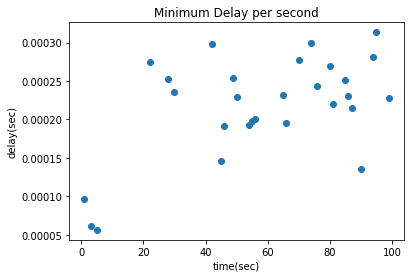

In [6]:
# sketch for min delay
timeRange = range(1, 101)
min_delays = delays_form.min()
plt.scatter(timeRange, min_delays)
plt.title("Minimum Delay per second")
plt.xlabel("time(sec)")
plt.ylabel("delay(sec)")
plt.show()


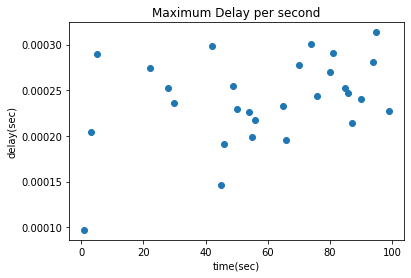

In [7]:
# sketch for max delay
max_delays = delays_form.max()
plt.scatter(timeRange, max_delays)
plt.title("Maximum Delay per second")
plt.xlabel("time(sec)")
plt.ylabel("delay(sec)")
plt.show()

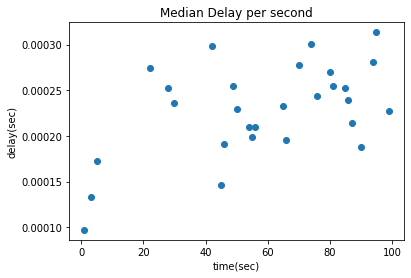

In [9]:
# sketch for median delay
median_delays = delays_form.median()
plt.scatter(timeRange, median_delays)
plt.title("Median Delay per second")
plt.xlabel("time(sec)")
plt.ylabel("delay(sec)")
plt.show()

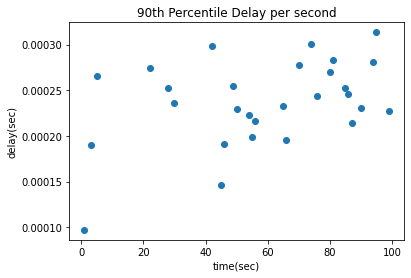

In [12]:
# sketch for 90th percentile delay
percentile_delays = delays_form.quantile(0.9)
plt.scatter(timeRange, percentile_delays)
plt.title("90th Percentile Delay per second")
plt.xlabel("time(sec)")
plt.ylabel("delay(sec)")
plt.show()

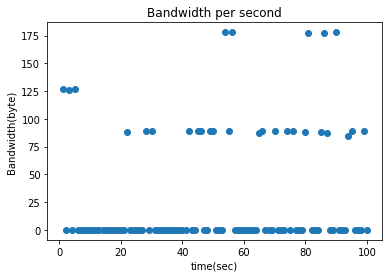

In [13]:
# sketch for bandwidth
bandwidth = bandwidths_form.sum()
plt.scatter(timeRange, bandwidth)
plt.title("Bandwidth per second")
plt.xlabel("time(sec)")
plt.ylabel("Bandwidth(byte)")
plt.show()